In [2]:
!pip install numpy pandas 

In [3]:
!pip install matplotlib seaborn

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
x = pd.read_csv('sugarcane_sensor_timeseries.csv')

In [6]:
x.head(5)

,timestamp,air_temperature_C,soil_temperature_C,relative_humidity_pct,soil_moisture_pct,soil_pH,soil_EC_dS_m,nitrate_ppm,phosphorus_ppm,potassium_ppm,leaf_wetness_pct,solar_radiation_W_m2,wind_speed_m_s,rainfall_mm,irrigation_event,fertilizer_event,pesticide_level_ppm,growth_stage,disease_risk_score,disease_observed
0,2024-09-22,31.58,29.14,55.4,25.37,6.01,0.697,19.16,11.18,171.24,37.0,199.0,0.83,9.6,0,1,0.004,emergence,0.590,0
1,2024-09-23,30.80,28.83,57.9,25.06,6.05,0.783,17.24,5.70,163.42,36.0,170.6,1.17,2.1,0,0,0.015,emergence,0.619,1
2,2024-09-24,31.74,29.95,57.1,35.30,5.93,0.678,16.99,8.19,163.86,24.9,200.2,1.28,20.0,0,0,0.018,emergence,0.609,0
3,2024-09-25,32.77,31.47,57.5,39.91,6.03,0.670,18.95,7.70,166.36,36.2,157.4,0.73,12.5,0,0,0.018,emergence,0.676,0
4,2024-09-26,30.65,28.81,54.0,43.19,6.03,0.776,21.81,9.33,175.13,32.8,119.4,0.75,10.1,0,0,0.527,emergence,0.638,0


In [7]:
x = x.drop('growth_stage',axis=1)

In [8]:
#x = pd.get_dummies(x,columns=['growth_stage'],dtype=int,drop_first=True)

In [9]:
x

,timestamp,air_temperature_C,soil_temperature_C,relative_humidity_pct,soil_moisture_pct,soil_pH,soil_EC_dS_m,nitrate_ppm,phosphorus_ppm,potassium_ppm,leaf_wetness_pct,solar_radiation_W_m2,wind_speed_m_s,rainfall_mm,irrigation_event,fertilizer_event,pesticide_level_ppm,disease_risk_score,disease_observed
0,2024-09-22,31.58,29.14,55.4,25.37,6.01,0.697,19.16,11.18,171.24,37.0,199.0,0.83,9.6,0,1,0.004,0.590,0
1,2024-09-23,30.80,28.83,57.9,25.06,6.05,0.783,17.24,5.70,163.42,36.0,170.6,1.17,2.1,0,0,0.015,0.619,1
2,2024-09-24,31.74,29.95,57.1,35.30,5.93,0.678,16.99,8.19,163.86,24.9,200.2,1.28,20.0,0,0,0.018,0.609,0
3,2024-09-25,32.77,31.47,57.5,39.91,6.03,0.670,18.95,7.70,166.36,36.2,157.4,0.73,12.5,0,0,0.018,0.676,0
4,2024-09-26,30.65,28.81,54.0,43.19,6.03,0.776,21.81,9.33,175.13,32.8,119.4,0.75,10.1,0,0,0.527,0.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-09-17,31.62,29.48,56.3,816.72,5.92,0.708,19.38,9.79,155.03,32.2,133.6,1.09,24.6,0,1,0.022,1.000,0
361,2025-09-18,32.84,30.95,57.1,831.24,5.90,0.658,18.85,9.36,172.94,24.3,137.0,1.50,29.6,0,0,0.029,1.000,0
362,2025-09-19,30.87,29.46,58.4,836.14,6.03,0.684,18.40,10.02,176.30,40.6,114.3,0.69,12.3,0,0,0.027,1.000,0
363,2025-09-20,31.48,29.03,54.8,837.13,6.06,0.709,19.56,8.49,173.57,41.6,123.7,0.99,3.4,0,0,0.016,1.000,0


In [10]:
x.drop('timestamp',axis=1,inplace=True)

In [11]:
!pip install scikit-learn

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rfr = RandomForestRegressor()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = x.drop(['pesticide_level_ppm','disease_risk_score'],axis=1)
y = x[['pesticide_level_ppm','disease_risk_score']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
rfr.fit(X,y)

RandomForestRegressor()

In [18]:
prediction = rfr.predict(X_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_27212\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

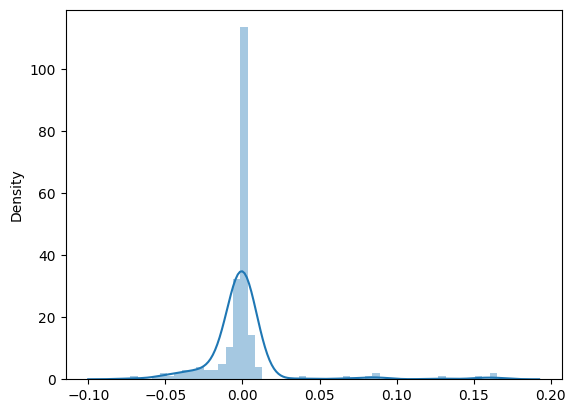

In [19]:
sns.distplot(y_test-prediction)

In [20]:
xx = pd.read_csv('sugarcane_sensor_timeseries.csv')

In [21]:
xx.drop('timestamp',axis=1,inplace=True)

In [22]:
def encode_growth_stage(df, column="growth_stage"):
    # Define the mapping in order
    stage_mapping = {
        "emergence": 0,
        "tillering": 1,
        "grand_growth": 2,
        "maturity": 3
    }
    
    # Map the values
    df[column] = df[column].map(stage_mapping)
    return df
xx = encode_growth_stage(xx,column="growth_stage")

In [23]:
xx['growth_stage'].unique()

array([0, 1, 2, 3], dtype=int64)

In [24]:
X1 = xx.drop(['growth_stage','disease_observed'],axis=1)
y1 = xx[['growth_stage','disease_observed']]

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X1,y1)

RandomForestClassifier()

In [29]:
prediction_c = rfc.predict(X_test1)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
rfc.predict(X_test1.iloc[[33]])

array([[3, 1]], dtype=int64)

In [32]:
y_test1.iloc[[33]]

,growth_stage,disease_observed
352,3,1


In [33]:
var = 'sugarcane_sensor_timeseries.csv'

In [34]:
df = pd.read_csv(var)

In [35]:
df= pd.get_dummies(df,columns=['growth_stage'],dtype=int)

In [36]:
df.drop(['timestamp'],axis=1,inplace=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
train_scaled = scaler.fit_transform(df)

In [40]:
pip install numpy==1.25

Note: you may need to restart the kernel to use updated packages.


In [41]:
from tensorflow.keras.models import load_model
model = load_model('latest_crop_TS_model.h5')

In [42]:
forcast = []
length=30
n_features=22
first_eval_batch = np.array(train_scaled[-length:])
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(60):
    next_features = current_batch[:, -1, :].copy() 
    pred = model.predict(current_batch)
    forcast.append(pred)
    current_batch = np.concatenate([current_batch[:, 1:, :], next_features.reshape(1,1,n_features)], axis=1)

1/1 [==============================] - 0s 23ms/step


In [43]:
forcast = np.array(forcast)
forcast = forcast.reshape(60,22)
forcast = scaler.inverse_transform(forcast)

In [44]:
forcast = pd.DataFrame(data=forcast,columns = df.columns)

In [45]:
forcast

,air_temperature_C,soil_temperature_C,relative_humidity_pct,soil_moisture_pct,soil_pH,soil_EC_dS_m,nitrate_ppm,phosphorus_ppm,potassium_ppm,leaf_wetness_pct,...,rainfall_mm,irrigation_event,fertilizer_event,pesticide_level_ppm,disease_risk_score,disease_observed,growth_stage_emergence,growth_stage_grand_growth,growth_stage_maturity,growth_stage_tillering
0,29.757914,28.237793,57.309574,731.443604,6.031287,0.689144,20.195158,9.308060,174.613190,35.028461,...,12.574436,-0.005685,-0.019338,0.013820,1.003321,0.074887,-0.083495,-0.018891,1.010129,0.089987
1,29.778362,28.248629,57.283436,733.145203,6.026079,0.690200,20.112148,9.283345,174.418259,34.912735,...,12.514154,-0.006971,-0.022586,0.013963,1.003757,0.077601,-0.079995,-0.020141,1.011355,0.084523
2,29.798742,28.265026,57.255188,734.331360,6.022276,0.691134,20.041246,9.258026,174.286102,34.833740,...,12.465413,-0.007752,-0.024819,0.014267,1.004141,0.079544,-0.077441,-0.021226,1.011730,0.080960
3,29.817123,28.280777,57.228245,735.178894,6.019474,0.691921,19.979063,9.235114,174.173996,34.780205,...,12.426254,-0.008115,-0.026472,0.014706,1.004389,0.080892,-0.075324,-0.021969,1.011650,0.078706
4,29.832485,28.294981,57.203548,735.778931,6.017424,0.692562,19.926748,9.215607,174.086075,34.743710,...,12.397937,-0.008248,-0.027717,0.015159,1.004546,0.081804,-0.073670,-0.022497,1.011338,0.077306
5,29.844616,28.306873,57.181854,736.182800,6.015924,0.693096,19.882599,9.198962,174.013489,34.717800,...,12.378356,-0.008221,-0.028678,0.015597,1.004627,0.082418,-0.072339,-0.022904,1.010891,0.076451
6,29.854290,28.316528,57.163532,736.484741,6.014829,0.693543,19.845573,9.184837,173.954147,34.699459,...,12.364874,-0.008097,-0.029426,0.015996,1.004654,0.082822,-0.071272,-0.023208,1.010461,0.075916
7,29.862106,28.323973,57.149006,736.721558,6.014031,0.693914,19.815643,9.173255,173.905853,34.687229,...,12.354508,-0.007931,-0.029990,0.016343,1.004657,0.083080,-0.070433,-0.023420,1.010114,0.075582
8,29.868134,28.329670,57.137272,736.902588,6.013447,0.694228,19.790539,9.163404,173.864853,34.678143,...,12.347389,-0.007735,-0.030440,0.016647,1.004632,0.083245,-0.069737,-0.023585,1.009809,0.075366
9,29.872580,28.333878,57.128044,737.007812,6.013022,0.694474,19.771078,9.155786,173.832565,34.672180,...,12.342013,-0.007561,-0.030777,0.016887,1.004609,0.083348,-0.069209,-0.023713,1.009527,0.075258


In [46]:
forcast.columns

Index(['air_temperature_C', 'soil_temperature_C', 'relative_humidity_pct',
       'soil_moisture_pct', 'soil_pH', 'soil_EC_dS_m', 'nitrate_ppm',
       'phosphorus_ppm', 'potassium_ppm', 'leaf_wetness_pct',
       'solar_radiation_W_m2', 'wind_speed_m_s', 'rainfall_mm',
       'irrigation_event', 'fertilizer_event', 'pesticide_level_ppm',
       'disease_risk_score', 'disease_observed', 'growth_stage_emergence',
       'growth_stage_grand_growth', 'growth_stage_maturity',
       'growth_stage_tillering'],
      dtype='object')

In [47]:
pred_main=rfr.predict(forcast.drop(['growth_stage_emergence',
       'growth_stage_grand_growth', 'growth_stage_maturity',
       'growth_stage_tillering','pesticide_level_ppm',
       'disease_risk_score'],axis=1))

In [48]:
pred_main.shape

(60, 2)

In [49]:
pred_main[:,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
forcast['pesticide_level_ppm'] = pred_main[:,0]

In [51]:
forcast['disease_risk_score'] = pred_main[:,1]

In [52]:
forcast

,air_temperature_C,soil_temperature_C,relative_humidity_pct,soil_moisture_pct,soil_pH,soil_EC_dS_m,nitrate_ppm,phosphorus_ppm,potassium_ppm,leaf_wetness_pct,...,rainfall_mm,irrigation_event,fertilizer_event,pesticide_level_ppm,disease_risk_score,disease_observed,growth_stage_emergence,growth_stage_grand_growth,growth_stage_maturity,growth_stage_tillering
0,29.757914,28.237793,57.309574,731.443604,6.031287,0.689144,20.195158,9.308060,174.613190,35.028461,...,12.574436,-0.005685,-0.019338,0.01832,1.0,0.074887,-0.083495,-0.018891,1.010129,0.089987
1,29.778362,28.248629,57.283436,733.145203,6.026079,0.690200,20.112148,9.283345,174.418259,34.912735,...,12.514154,-0.006971,-0.022586,0.01798,1.0,0.077601,-0.079995,-0.020141,1.011355,0.084523
2,29.798742,28.265026,57.255188,734.331360,6.022276,0.691134,20.041246,9.258026,174.286102,34.833740,...,12.465413,-0.007752,-0.024819,0.01798,1.0,0.079544,-0.077441,-0.021226,1.011730,0.080960
3,29.817123,28.280777,57.228245,735.178894,6.019474,0.691921,19.979063,9.235114,174.173996,34.780205,...,12.426254,-0.008115,-0.026472,0.01795,1.0,0.080892,-0.075324,-0.021969,1.011650,0.078706
4,29.832485,28.294981,57.203548,735.778931,6.017424,0.692562,19.926748,9.215607,174.086075,34.743710,...,12.397937,-0.008248,-0.027717,0.01806,1.0,0.081804,-0.073670,-0.022497,1.011338,0.077306
5,29.844616,28.306873,57.181854,736.182800,6.015924,0.693096,19.882599,9.198962,174.013489,34.717800,...,12.378356,-0.008221,-0.028678,0.01801,1.0,0.082418,-0.072339,-0.022904,1.010891,0.076451
6,29.854290,28.316528,57.163532,736.484741,6.014829,0.693543,19.845573,9.184837,173.954147,34.699459,...,12.364874,-0.008097,-0.029426,0.01835,1.0,0.082822,-0.071272,-0.023208,1.010461,0.075916
7,29.862106,28.323973,57.149006,736.721558,6.014031,0.693914,19.815643,9.173255,173.905853,34.687229,...,12.354508,-0.007931,-0.029990,0.01835,1.0,0.083080,-0.070433,-0.023420,1.010114,0.075582
8,29.868134,28.329670,57.137272,736.902588,6.013447,0.694228,19.790539,9.163404,173.864853,34.678143,...,12.347389,-0.007735,-0.030440,0.01835,1.0,0.083245,-0.069737,-0.023585,1.009809,0.075366
9,29.872580,28.333878,57.128044,737.007812,6.013022,0.694474,19.771078,9.155786,173.832565,34.672180,...,12.342013,-0.007561,-0.030777,0.01835,1.0,0.083348,-0.069209,-0.023713,1.009527,0.075258


In [53]:
pred_main1=rfc.predict(forcast.drop(['disease_observed', 'growth_stage_emergence',
       'growth_stage_grand_growth', 'growth_stage_maturity',
       'growth_stage_tillering'],axis=1))

In [54]:
pred_main1

array([[3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0]], dtype=int64)

In [55]:
forcast['disease_observed']=pred_main1[:,1]

In [56]:
forcast

,air_temperature_C,soil_temperature_C,relative_humidity_pct,soil_moisture_pct,soil_pH,soil_EC_dS_m,nitrate_ppm,phosphorus_ppm,potassium_ppm,leaf_wetness_pct,...,rainfall_mm,irrigation_event,fertilizer_event,pesticide_level_ppm,disease_risk_score,disease_observed,growth_stage_emergence,growth_stage_grand_growth,growth_stage_maturity,growth_stage_tillering
0,29.757914,28.237793,57.309574,731.443604,6.031287,0.689144,20.195158,9.308060,174.613190,35.028461,...,12.574436,-0.005685,-0.019338,0.01832,1.0,0,-0.083495,-0.018891,1.010129,0.089987
1,29.778362,28.248629,57.283436,733.145203,6.026079,0.690200,20.112148,9.283345,174.418259,34.912735,...,12.514154,-0.006971,-0.022586,0.01798,1.0,0,-0.079995,-0.020141,1.011355,0.084523
2,29.798742,28.265026,57.255188,734.331360,6.022276,0.691134,20.041246,9.258026,174.286102,34.833740,...,12.465413,-0.007752,-0.024819,0.01798,1.0,0,-0.077441,-0.021226,1.011730,0.080960
3,29.817123,28.280777,57.228245,735.178894,6.019474,0.691921,19.979063,9.235114,174.173996,34.780205,...,12.426254,-0.008115,-0.026472,0.01795,1.0,0,-0.075324,-0.021969,1.011650,0.078706
4,29.832485,28.294981,57.203548,735.778931,6.017424,0.692562,19.926748,9.215607,174.086075,34.743710,...,12.397937,-0.008248,-0.027717,0.01806,1.0,0,-0.073670,-0.022497,1.011338,0.077306
5,29.844616,28.306873,57.181854,736.182800,6.015924,0.693096,19.882599,9.198962,174.013489,34.717800,...,12.378356,-0.008221,-0.028678,0.01801,1.0,0,-0.072339,-0.022904,1.010891,0.076451
6,29.854290,28.316528,57.163532,736.484741,6.014829,0.693543,19.845573,9.184837,173.954147,34.699459,...,12.364874,-0.008097,-0.029426,0.01835,1.0,0,-0.071272,-0.023208,1.010461,0.075916
7,29.862106,28.323973,57.149006,736.721558,6.014031,0.693914,19.815643,9.173255,173.905853,34.687229,...,12.354508,-0.007931,-0.029990,0.01835,1.0,0,-0.070433,-0.023420,1.010114,0.075582
8,29.868134,28.329670,57.137272,736.902588,6.013447,0.694228,19.790539,9.163404,173.864853,34.678143,...,12.347389,-0.007735,-0.030440,0.01835,1.0,0,-0.069737,-0.023585,1.009809,0.075366
9,29.872580,28.333878,57.128044,737.007812,6.013022,0.694474,19.771078,9.155786,173.832565,34.672180,...,12.342013,-0.007561,-0.030777,0.01835,1.0,0,-0.069209,-0.023713,1.009527,0.075258


In [57]:
def yes_or_no(x):
    if x == 1:
        return 'yes'
    else:
        return 'no'

In [58]:
df['growth_stage_grand_growth']

0      0
1      0
2      0
3      0
4      0
      ..
360    0
361    0
362    0
363    0
364    0
Name: growth_stage_grand_growth, Length: 365, dtype: int32

In [59]:
def solution(df):
    dRisk = round(np.mean(df['disease_risk_score'])*100,2)
    print(f'Disease Risk percentage: {dRisk}')
    dObserved = np.mean(df['disease_observed'])
    print('Is the disease Observed:',yes_or_no(dObserved))
    pestAmt = round(np.mean(df['pesticide_level_ppm']),4)
    print(f'Amount of pesticide to be given in PPM: {pestAmt}')
    maturity = np.mean(df['growth_stage_maturity'])
    tillering= np.mean(df['growth_stage_tillering'])
    grand_growth = np.mean(df['growth_stage_grand_growth'])
    emergence = np.mean(df['growth_stage_emergence'])
    my_dict = {'maturity': maturity, 'tillering': tillering, 'grand_growth': grand_growth, 'emergence': emergence}
    value_to_find = np.max([maturity,tillering,grand_growth,emergence])
    keys = [k for k, v in my_dict.items() if v == value_to_find]
    growthStage = keys[0]
    print(f'The growth stage/status of the sugarcane is {growthStage}')
    return dRisk,dObserved,pestAmt,growthStage

In [60]:
dRisk,dObserved,pestAmt,growthStage = solution(forcast)

Disease Risk percentage: 100.0
Is the disease Observed: no
Amount of pesticide to be given in PPM: 0.0183
The growth stage/status of the sugarcane is maturity


In [61]:
print(f'The disease Risk is observed to be {dRisk} and the disease observed is {yes_or_no(dObserved)}, and the amount of pesticide that must be provided for the foll crops must be {pestAmt} and finally the growth stage is {growthStage}')

The disease Risk is observed to be 100.0 and the disease observed is no, and the amount of pesticide that must be provided for the foll crops must be 0.0183 and finally the growth stage is maturity


In [62]:
import joblib 
joblib.dump(rfr,'Regressor.joblib')

['Regressor.joblib']

In [63]:
joblib.dump(rfc,'Classifier.joblib')

['Classifier.joblib']